***
# `Project:` Prevendo a <font color='blue'>morte</font> ou <font color='blue'>vida</font> de pacientes com hepatite

## `Date:` fevereiro, 2022

## `Data Scientist:` Walter Trevisan
***

# `Análise Exploratória(EDA)-Etapa 2`

Nesta etapa, vamos realizar a **`Análise Exploratória`** dos dados, utilizando o *dataset* de treinamento utilizado na etapa anterior, ou seja, o *data frame* que foi salvo no arquivo **`train_set.pkl`**.

Então, vamos realizar as seguintes atividades:

1. **Carregar** o *data frame* de treinamento, salvo no arquivo **`train_set.pkl`**;

2. **Carregar** o *object* utilizado no processo de **imputação múltipla**, salvo no arquivo **`imputer_mv.pkl`**;

3. **Realizar** uma **análise univariada** das variáveis **numéricas**;

4. **Tratar** os **outliers** (**univariados**) das variáveis **numéricas**;

5. **Conclusões**

## <font color='blue'>Setup</font>

Primeiro, vamos carregar os **pacotes e funções** que serão utilizadas neste **notebook**.

In [1]:
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor.
# Então, vamos desativar essas mensagens.
import sys # O pacote "sys" permite manipulações com o sistema operacional:
import os  # Operation System (Packages and Functions)
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Importa função para verificarmos a versão da linguagem python:
from platform import python_version

# Importando o pacote NumPy:
import numpy as np
# Importando o pacote Pandas:
import pandas as pd
# Importando o pacote Scipy:
import scipy

# Importa função para tratamento de outliers:
from scipy.stats.mstats import winsorize

# Importando pacotes para visualização de gráficos:
import matplotlib as mpl
import matplotlib.pyplot as plt
# Importa o pacote "seaborn" para criarmos gráficos estatísticos:
import seaborn as sns
%matplotlib inline

# Definindo o diretório raiz (Root) onde serão armazenados todas as informações
# (Imagens, Gráficos, Objetos, Dados, Modelos de ML, etc...) do projeto.
# Diretório Raiz (Root) do Projeto:
ROOT_DIR = "."

# Path: onde ficarão armazenados os "Objetos" (Estrututras de Dados) relacionados ao Projeto:
OBJ_PATH = os.path.join(ROOT_DIR, "objects")
# Criando o diretório, se ele não existir:
os.makedirs(OBJ_PATH, exist_ok=True)

# Path: onde ficarão armazenados os "datasets" (arquivos "csv") e os "objetos" (Data Frames) do Projeto:
DATA_PATH = os.path.join(ROOT_DIR, "data")
# Criando o diretório, se ele não existir:
os.makedirs(DATA_PATH, exist_ok=True)

# Path: onde serão armazenadas as "Imagens" (Figuras e Gráficos) do Projeto:
GRAPHICS_PATH = os.path.join(ROOT_DIR, "images", "graphics")
# Criando o diretório, se ele não existir:
os.makedirs(GRAPHICS_PATH, exist_ok=True)

# Path: onde estão armazenadas as classes e funções que serão utilizadas neste notebook:
LIB_PATH = os.path.join(ROOT_DIR, "library")

# Adicionando o diretório "./library" ao 'path' do Sistema, para podermos importar classes e funções que serão
# utilizadas neste notebook:
sys.path.append(LIB_PATH)

# Importando para este notebook, as classes e funções definidas no módulo "data_science_library.py":
import data_science_library as dslib

# Importando para este notebook, as classes e funções definidas no módulo "plot_library.py":
import plot_library as ptlib

# Importando para este notebook, as classes e funções definidas no módulo "project_library.py":
import project_library as pjlib

# Criando um objeto para calularmos o tempo gasto no processo de "imputação múltipla"
# das variáveis numéricas:
ept = dslib.ElapsedTime(builder_msg=False)

print("Setup Complete!")

Setup Complete!


In [2]:
# Versões dos pacotes usados neste jupyter notebook:
print("Versões dos pacotes usados neste jupyter notebook:")
print("Python      : {}".format(python_version()))
print("Numpy       : {}".format(np.__version__))
print("Pandas      : {}".format(pd.__version__))
print("Scipy       : {}".format(scipy.__version__))
print("Matplotlib  : {}".format(mpl.__version__))
print("Seaborn     : {}".format(sns.__version__))

Versões dos pacotes usados neste jupyter notebook:
Python      : 3.8.12
Numpy       : 1.19.5
Pandas      : 1.3.5
Scipy       : 1.7.3
Matplotlib  : 3.4.3
Seaborn     : 0.11.2


## <font color='blue'>1- Carregar o *data frame* de treinamento: `train_set.pkl`</font>

In [3]:
# Carregando o objeto (data frame) no arquivo "train_set.pkl":
data_df = dslib.pickle_object_load(
    path=DATA_PATH, file="train_set.pkl",
    msg="O arquivo 'train_set.pkl' (data frame) foi carregado com sucesso!"
)

O arquivo 'train_set.pkl' (data frame) foi carregado com sucesso!


## <font color='blue'>2- Carregar o *objeto* para imputação múltipla: `imputer_mv.pkl`</font>

In [4]:
# Carregando o objeto (data frame) no arquivo "imputer_mv.pkl":
imputer_mv = dslib.pickle_object_load(
    path=OBJ_PATH, file="imputer_mv.pkl",
    msg="O arquivo 'imputer_mv.pkl' (objeto) foi carregado com sucesso!"
)

O arquivo 'imputer_mv.pkl' (objeto) foi carregado com sucesso!


## <font color='blue'>3- Análise univariada das variáveis `numéricas`</font>

### Preparando as variáveis `numéricas`

Primeiro, precisamos transformar as variáveis categóricas preditivas em variáveis numéricas. Então, utilizaremos um método chamado de **encoding** para fazer as transformações.

In [5]:
# Separando as variáveis categóricas:
var = (data_df.dtypes == 'object')
var_cat = list(var[var == True].index)
# Eliminando a variável target (Class) da lista:
var_cat.remove('Class')
# Criando um dataframe com as variáveis categóricas:
data_cat_df = data_df.loc[:, var_cat]
# Aplicando o método "encoding":
var_cat_enc_df = pjlib.method_encoding_categorical(df=data_cat_df, target=False)
# Resumo do dataframe transformado:
var_cat_enc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Gender          123 non-null    int64
 1   Steroid         123 non-null    int64
 2   Antivirals      123 non-null    int64
 3   Fatigue         123 non-null    int64
 4   Malaise         123 non-null    int64
 5   Anorexia        123 non-null    int64
 6   LiverBig        123 non-null    int64
 7   LiverFirm       123 non-null    int64
 8   SpleenPalpable  123 non-null    int64
 9   Spiders         123 non-null    int64
 10  Ascites         123 non-null    int64
 11  Varices         123 non-null    int64
 12  Histology       123 non-null    int64
dtypes: int64(13)
memory usage: 12.6 KB


In [6]:
# Selecionando apenas as variáveis numéricas do "dataset":
var = (data_df.dtypes == 'float64')
var_num = list(var[var == True].index)
var_num_df = data_df.loc[:, var_num]

In [7]:
# Criando um dataframe único com todas as variáveis numéricas:
data_num_df = pd.concat([var_cat_enc_df, var_num_df], axis=1)
# Resumo do dataframe final:
data_num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          123 non-null    int64  
 1   Steroid         123 non-null    int64  
 2   Antivirals      123 non-null    int64  
 3   Fatigue         123 non-null    int64  
 4   Malaise         123 non-null    int64  
 5   Anorexia        123 non-null    int64  
 6   LiverBig        123 non-null    int64  
 7   LiverFirm       123 non-null    int64  
 8   SpleenPalpable  123 non-null    int64  
 9   Spiders         123 non-null    int64  
 10  Ascites         123 non-null    int64  
 11  Varices         123 non-null    int64  
 12  Histology       123 non-null    int64  
 13  Age             123 non-null    float64
 14  Bilirubin       123 non-null    float64
 15  AlkPhosphate    123 non-null    float64
 16  SGOT            123 non-null    float64
 17  Albumin         123 non-null    flo

### Analisando a distribuição dos dados em cada variável

In [8]:
# Criando uma lista das variáveis numéricas:
variables_num = list(var_num_df)
# Criando uma lista com as unidades de medida:
units = ['Anos', 'mg/L', 'U/L', 'U/L', 'g/L', 'segundos']

In [9]:
# Calculando algumas medidas estatísticas de tendência central, dispersão e de forma:
dslib.statistical_measures(df=data_num_df, feature=variables_num)

,Age,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime
count,123.000,123.000,123.000,123.000,123.000,123.000
mean,41.268,14.116,108.406,82.235,38.425,64.649
median,39.000,10.000,92.930,58.000,40.000,66.000
mode,30.000,10.000,85.000,20.000,40.000,100.000
std,12.676,12.335,49.982,80.151,6.562,20.820
var_coff,30.717,87.389,46.106,97.465,17.078,32.205
min,7.000,3.000,26.000,14.000,22.000,21.000
25%,32.000,8.000,78.000,31.000,35.000,49.000
50%,39.000,10.000,92.930,58.000,40.000,66.000
75%,50.000,15.000,133.880,95.000,42.000,79.010


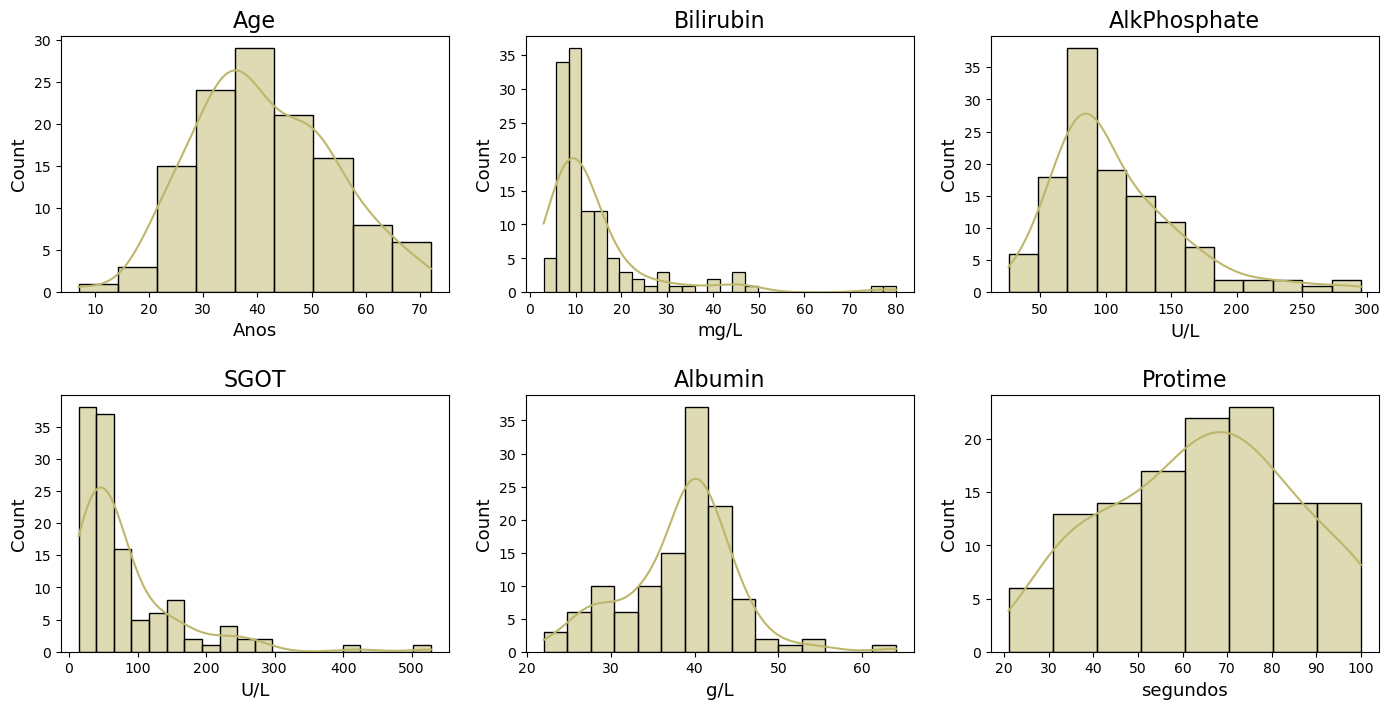

In [10]:
# Histogramas:
ptlib.plot_histograms(
    data=data_num_df, x=variables_num, kde=True, plot_style=None, color='darkkhaki', titles=variables_num,
    titles_fontsize=16, xlabels=units, xlabels_fontsize=13, ylabels='Count', ylabels_fontsize=13,
    xtick_labelsize=10, ytick_labelsize=10, cols_nr=3, rows_nr=2, width=17, height=8, wspace=None, hspace=0.4
)

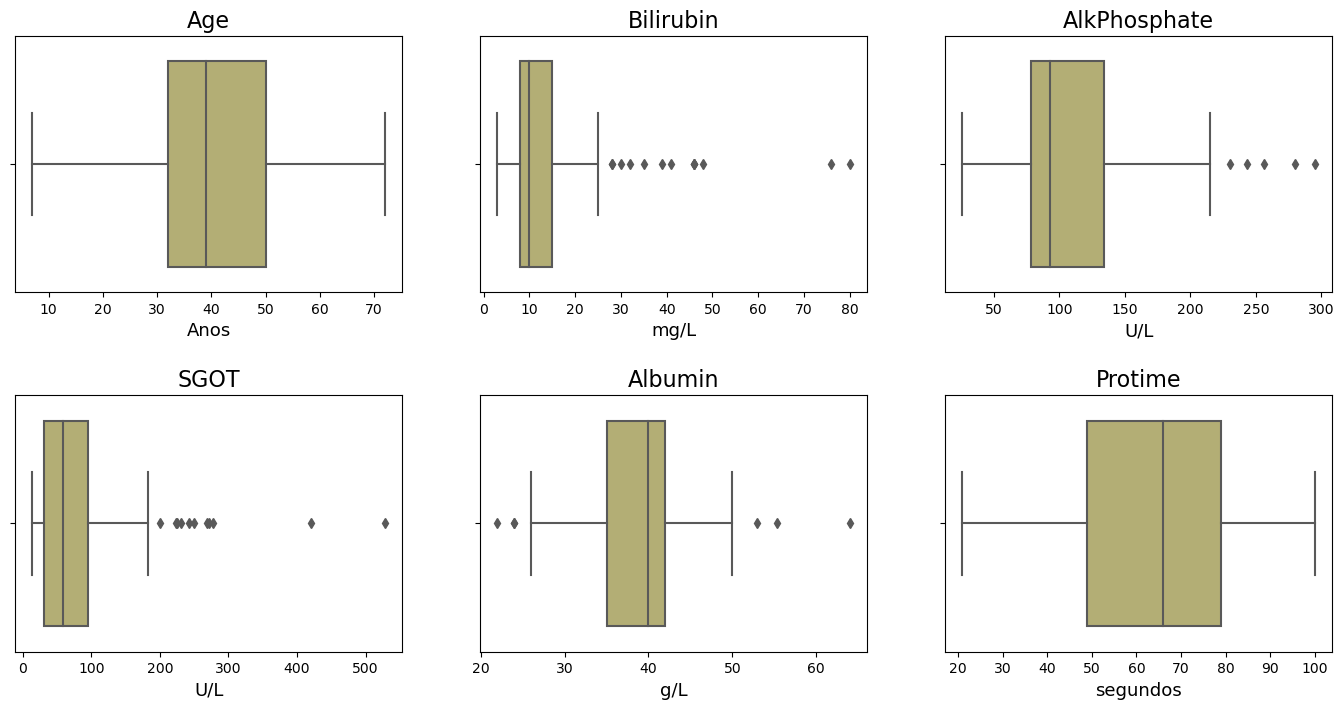

In [11]:
# Boxplots:
ptlib.plot_boxplots(
    x=variables_num, data=data_num_df, order=None, hue_order=None, colors='darkkhaki', plot_style=None,
    titles=variables_num, titles_fontsize=16, xlabels=units, xlabels_fontsize=13, xtick_labelsize=10,
    cols_nr=3, rows_nr=2, width=17, height=8, wspace=None, hspace=0.4
)

In [12]:
# Testes de hipóteses para verificarmos se as variáveis seguem (ou não) uma "distribuição normal":
dslib.shapiro_test(data=data_num_df, features=variables_num)

,confidence level,p-value,test
Variable,,,
Age,0.95,0.2355463206768036,yes
Bilirubin,0.95,4.2425437167310667e-16,no
AlkPhosphate,0.95,7.345010999415535e-08,no
SGOT,0.95,4.9685963351454865e-14,no
Albumin,0.95,0.00020763890643138438,no
Protime,0.95,0.011991634033620358,no


#### <font color='red'>Age</font>

* os pacientes possuem idades entre **7 anos** e **72 anos**, e em média **41 anos**;

* o coeficiente de variação (**var_coff**) é interpretado como a variabilidade dos dados em relação à média. Quanto menor for o seu valor mais homogêneo é o conjunto de dados, ou seja, os dados possuem uma baixa dispersão em torno da média. Neste caso, o valor calculado indica que os dados possuem uma **média dispersão** em torno da média;

* **[skewness](https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de)**: o valor calculado informa que os dados são **bastante simétricos** (o valor está entre `-0.5 e 0.5`), ou seja, temos uma **distribuição simétrica**, conforme podemos observar no gráfico do **histograma**;

* **[kurtosis](https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de)**: o valor calculado (`~ 0.0`) informa que os dados são **similares à uma distribuição normal**. Neste caso, não temos **outliers** na distribuição dos dados, conforme podemos observar no gráfico do **boxplot**;

* o teste de hipótese confirma, com **95%** de confiança, que a distribuição dos dados **seguem uma distribuição normal**.

#### <font color='red'>Bilirubin</font>

* os resultados do exame de **Bilirrubina** apresentaram valores entre **3 mg/L** e **80 mg/L**, e em média **14.11 mg/L**;

* o valor calculado do coeficiente de variação (**var_coff**) indica que os dados possuem uma **alta dispersão** em torno da média;

* **[skewness](https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de)**: o valor calculado informa que os dados são **altamente assimétricos** (o valor é `> 1`), ou seja, temos uma **distribuição assimétrica positiva** (cauda alongada para a direita), conforme podemos observar no gráfico do **histograma**;

* **[kurtosis](https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de)**: o valor calculado (`> 0`) informa que os dados possuem uma **distribuição leptocúrtica**, ou seja, a sua distribuição é mais longa para a direita. Isto significa que temos **outliers** na distribuição dos dados (conforme podemos observar no gráfico do **boxplot**), que esticam o eixo horizontal do gráfico do histograma para a direita, o que faz com que a maior parte dos dados apareça em uma faixa vertical estreita ("magra"), dando assim a "pele" de uma distribuição leptocúrtica;

* o teste de hipótese confirma, com **95%** de confiança, que a distribuição dos dados **não seguem uma distribuição normal**.

#### <font color='red'>AlkPhosphate</font>

* os resultados do exame de **fosfatase alcalina** (**ALP**) apresentaram valores entre **26 U/L** e **295 U/L**, e em média **108 U/L**;

* o valor calculado do coeficiente de variação (**var_coff**) indica que os dados possuem uma **alta dispersão** em torno da média;

* **[skewness](https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de)**: o valor calculado informa que os dados são **altamente assimétricos** (o valor é `> 1`), ou seja, temos uma **distribuição assimétrica positiva** (cauda alongada para a direita), conforme podemos observar no gráfico do **histograma**;

* **[kurtosis](https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de)**: o valor calculado (`> 0`) informa que os dados possuem uma **distribuição leptocúrtica**, ou seja, a sua distribuição é mais longa para a direita. Isto significa que temos **outliers** na distribuição dos dados (conforme podemos observar no gráfico do **boxplot**), que esticam o eixo horizontal do gráfico do histograma para a direita, o que faz com que a maior parte dos dados apareça em uma faixa vertical estreita ("magra"), dando assim a "pele" de uma distribuição leptocúrtica;

* o teste de hipótese confirma, com **95%** de confiança, que a distribuição dos dados **não seguem uma distribuição normal**.

#### <font color='red'>SGOT</font>

* os resultados do exame de **aspartato aminotransferase ou transaminase oxalacética** (**AST ou TGO**) apresentaram valores entre **14 U/L** e **528 U/L**, e em média **82 U/L**;

* o valor calculado do coeficiente de variação (**var_coff**) indica que os dados possuem uma **alta dispersão** em torno da média;

* **[skewness](https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de)**: o valor calculado informa que os dados são **altamente assimétricos** (o valor é `> 1`), ou seja, temos uma **distribuição assimétrica positiva** (cauda alongada para a direita), conforme podemos observar no gráfico do **histograma**;

* **[kurtosis](https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de)**: o valor calculado (`> 0`) informa que os dados possuem uma **distribuição leptocúrtica**, ou seja, a sua distribuição é mais longa para a direita. Isto significa que temos **outliers** na distribuição dos dados (conforme podemos observar no gráfico do **boxplot**), que esticam o eixo horizontal do gráfico do histograma para a direita, o que faz com que a maior parte dos dados apareça em uma faixa vertical estreita ("magra"), dando assim a "pele" de uma distribuição leptocúrtica;

* o teste de hipótese confirma, com **95%** de confiança, que a distribuição dos dados **não seguem uma distribuição normal**.

#### <font color='red'>Albumin</font>

* os resultados do exame de **Albumina** apresentaram valores entre **22 g/L** e **64 g/L**, e em média **38 g/L**;

* o valor calculado do coeficiente de variação (**var_coff**) indica que os dados possuem uma **baixa dispersão** em torno da média;

* **[skewness](https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de)**: o valor calculado informa que os dados são **bastante simétricos** (o valor está entre `-0.5 e 0.5`), ou seja, temos uma **distribuição simétrica**, conforme podemos observar no gráfico do **histograma**;

* **[kurtosis](https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de)**: o valor calculado (`> 0`) informa que os dados possuem uma **distribuição leptocúrtica**, ou seja, a sua distribuição é um pouco mais longa para a direita. Isto significa que temos **outliers** na distribuição dos dados (conforme podemos observar no gráfico do **boxplot**), que esticam um pouco o eixo horizontal do gráfico do histograma para a direita, o que faz com que a maior parte dos dados apareça em uma faixa vertical estreita ("magra"), dando assim a "pele" de uma distribuição leptocúrtica;

* o teste de hipótese confirma, com **95%** de confiança, que a distribuição dos dados **não seguem uma distribuição normal**.

#### <font color='red'>Protime</font>

* os resultados do exame do **Tempo de Protrombina (TP)** apresentaram valores entre **21 seg** e **100 seg**, e em média **65 g/dL**;

* o valor calculado do coeficiente de variação (**var_coff**) indica que os dados possuem uma **moderada dispersão** em torno da média;

* **[skewness](https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de)**: o valor calculado informa que os dados são **bastante simétricos** (o valor está entre `-0.5 e 0.5`), ou seja, temos uma **distribuição simétrica**, conforme podemos observar no gráfico do **histograma**;

* **[kurtosis](https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de)**: o valor calculado (`~ 0.0`) informa que os dados possuem uma **distribuição mesocúrtica**, ou seja, a sua distribuição é **similar à uma distribuição normal** e não temos **outliers** na distribuição dos dados (conforme podemos observar no gráfico do **boxplot**);

* o teste de hipótese confirma, com **95%** de confiança, que a distribuição dos dados **não seguem uma distribuição normal**.

### Analisando os diagnósticos dos resultados de cada exame

In [13]:
# Faz uma cópia da lista de variáveis numéricas:
variables_results = variables_num
# Elimina a variável 'Age' da lista, mantendo apenas
# as variáveis dos exames:
variables_results.remove('Age')
# Calculando os diagnósticos:
diagnosis_df = pjlib.test_diagnosis(data=data_num_df, results=variables_results)

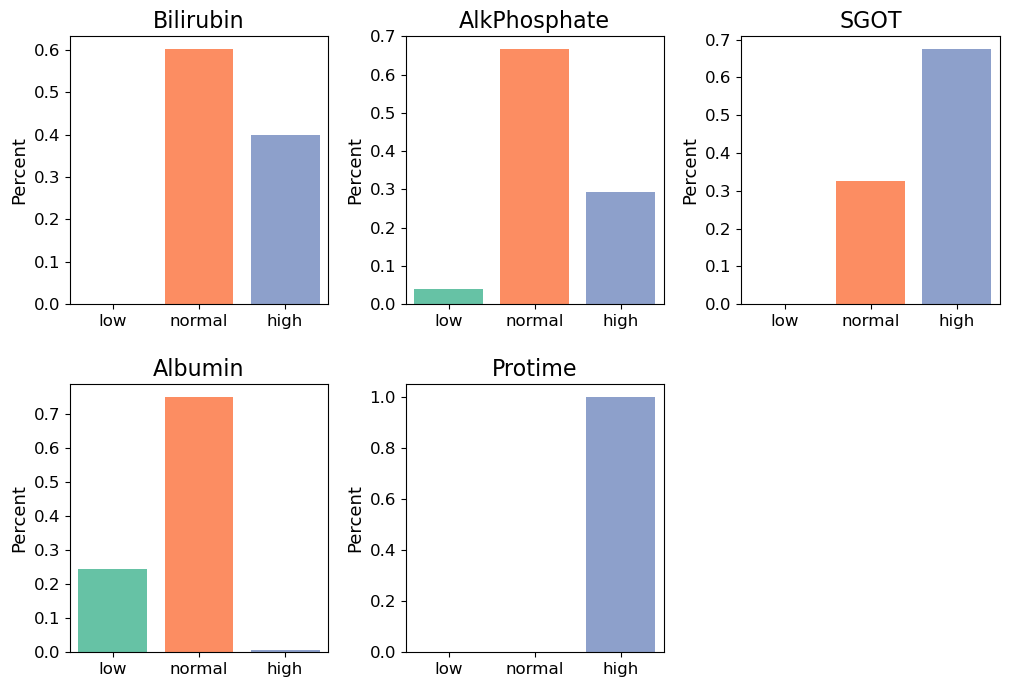

,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime
low,0.0000,0.0407,0.0000,0.2439,0.0
normal,0.6016,0.6667,0.3252,0.7480,0.0
high,0.3984,0.2927,0.6748,0.0081,1.0


In [14]:
# Plot dos diagnósticos:
ptlib.plot_countplots(
    data=diagnosis_df, x=variables_results, percent=True, output=True, plot_style=None, palette="Set2", saturation=1.0,
    titles=variables_results, titles_fontsize=16, xlabels=None, xlabels_fontsize=13, ylabels='Percent', ylabels_fontsize=13,
    xtick_labelsize=12, ytick_labelsize=12, cols_nr=3, rows_nr=2, width=12, height=8, wspace=0.3, hspace=0.3
)

**Análise:**
* a maioria dos pacientes apresentaram um diagnóstico **normal** para os exames de **Bilirrubina** (`Bilirubin`), **Fosfatase Alcalina** (`AlkPhosphate`) e **Albumina** (`Albumin`);

* a maioria dos pacientes apresentaram um diagnóstico **alto** para o exame de **Aspartato Aminotransferase** (`SGOT`);

* **todos** os pacientes apresentaram um diagnóstico **alto** para o exame de **Tempo de Protrombina** (`Protime`).

## <font color='blue'>4- Tratamento dos `outliers` univariados das variáveis `numéricas`</font>

### Aplicando transformação `logarítmica`, `raiz quadrada` e `raiz cúbica` em todas as variáveis

In [15]:
# Aplicando as transformações:
transf_df = dslib.transf_num(
    data=data_num_df,
    variables=['Bilirubin', 'AlkPhosphate', 'SGOT', 'Albumin', 'Protime']
)

# Calculando algumas medidas estatísticas de tendência central, dispersão e de forma:
dslib.statistical_measures(df=transf_df, feature=list(transf_df.columns))

,Bilirubin,Bilirubin_log,Bilirubin_r2,Bilirubin_r3,AlkPhosphate,AlkPhosphate_log,AlkPhosphate_r2,AlkPhosphate_r3,SGOT,SGOT_log,SGOT_r2,SGOT_r3,Albumin,Albumin_log,Albumin_r2,Albumin_r3,Protime,Protime_log,Protime_r2,Protime_r3
count,123.000,123.000,123.000,123.000,123.000,123.000,123.000,123.000,123.000,123.000,123.000,123.000,123.000,123.000,123.000,123.000,123.000,123.000,123.000,123.000
mean,14.116,2.433,3.542,2.297,108.406,4.591,10.167,4.669,82.235,4.078,8.328,4.034,38.425,3.633,6.176,3.363,64.649,4.109,7.927,3.962
median,10.000,2.303,3.162,2.154,92.930,4.532,9.640,4.530,58.000,4.060,7.616,3.871,40.000,3.689,6.325,3.420,66.000,4.190,8.124,4.041
mode,10.000,2.303,3.162,2.154,85.000,4.443,9.220,4.397,20.000,2.996,4.472,2.714,40.000,3.689,6.325,3.420,100.000,4.605,10.000,4.642
std,12.335,0.594,1.257,0.509,49.982,0.436,2.252,0.684,80.151,0.789,3.603,1.124,6.562,0.179,0.537,0.197,20.820,0.363,1.352,0.460
var_coff,87.389,24.408,35.486,22.178,46.106,9.497,22.147,14.640,97.465,19.351,43.267,27.870,17.078,4.914,8.699,5.845,32.205,8.845,17.055,11.606
min,3.000,1.099,1.732,1.442,26.000,3.258,5.099,2.962,14.000,2.639,3.742,2.410,22.000,3.091,4.690,2.802,21.000,3.045,4.583,2.759
25%,8.000,2.079,2.828,2.000,78.000,4.357,8.832,4.273,31.000,3.434,5.568,3.141,35.000,3.555,5.916,3.271,49.000,3.892,7.000,3.659
50%,10.000,2.303,3.162,2.154,92.930,4.532,9.640,4.530,58.000,4.060,7.616,3.871,40.000,3.689,6.325,3.420,66.000,4.190,8.124,4.041
75%,15.000,2.708,3.873,2.466,133.880,4.897,11.571,5.116,95.000,4.553,9.746,4.562,42.000,3.738,6.481,3.476,79.010,4.370,8.889,4.291


In [16]:
# Teste de hipóteses:
dslib.shapiro_test(data=transf_df, features=list(transf_df.columns))

,confidence level,p-value,test
Variable,,,
Bilirubin,0.95,4.2425437167310667e-16,no
Bilirubin_log,0.95,2.321061856491724e-06,no
Bilirubin_r2,0.95,7.135605908231701e-12,no
Bilirubin_r3,0.95,3.879506438320135e-10,no
AlkPhosphate,0.95,7.345010999415535e-08,no
AlkPhosphate_log,0.95,0.3207724392414093,yes
AlkPhosphate_r2,0.95,0.001423314562998712,no
AlkPhosphate_r3,0.95,0.025826096534729004,no
SGOT,0.95,4.9685963351454865e-14,no


**Análise:** com **95%** de confiança apenas a variável `AlkPhosphate_log` **segue uma distribuição normal**, de acordo com o `p-value`.

Então, vamos criar alguns gráficos (**histogramas** e **boxplots**) para analisar as variáveis transformadas.

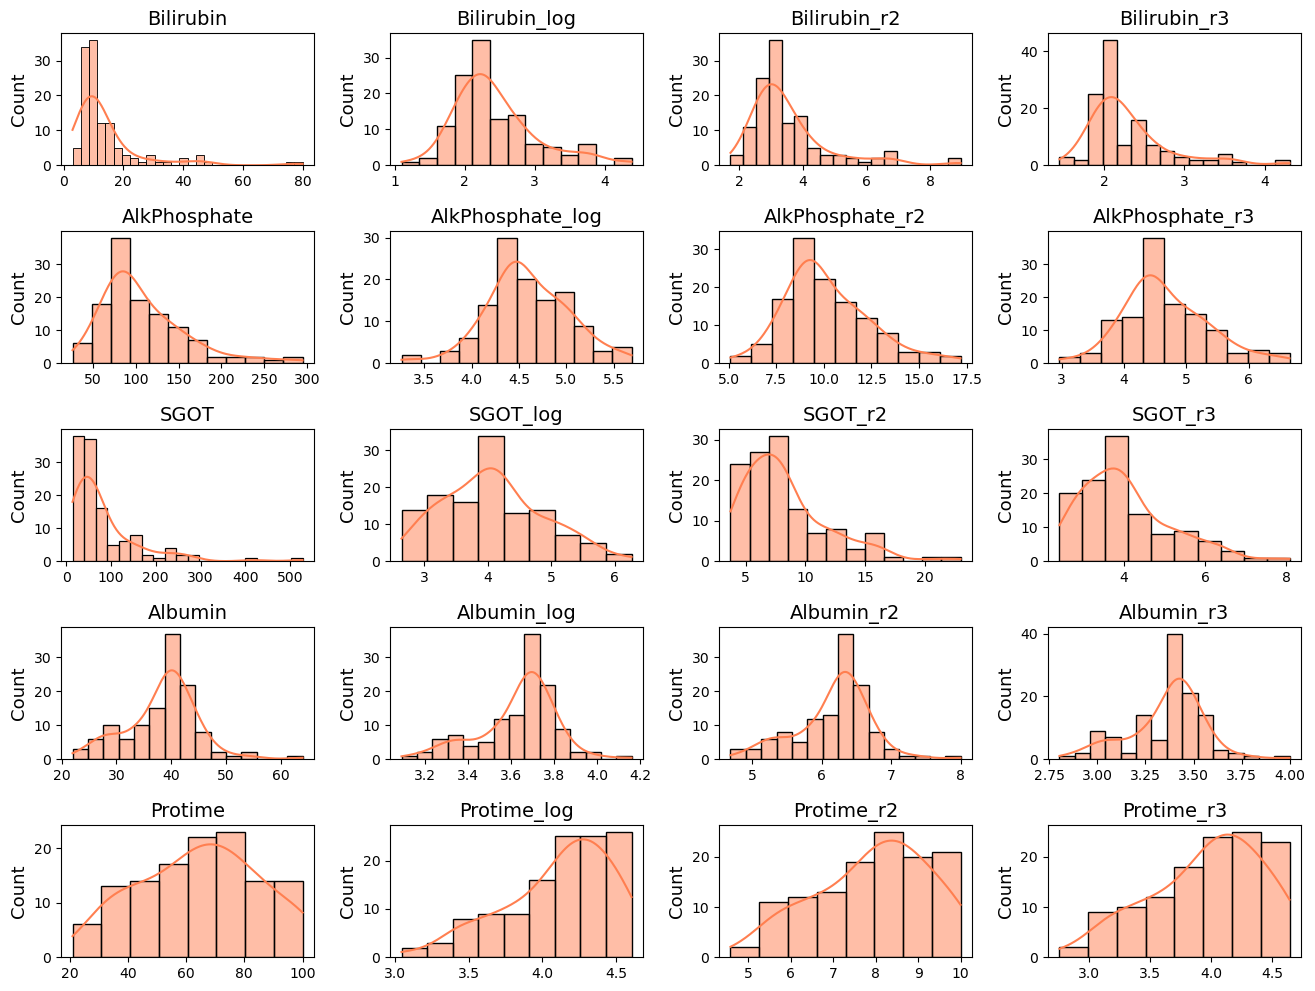

In [17]:
# Histogramas:
ptlib.plot_histograms(
    data=transf_df, x=list(transf_df.columns), bins='auto', plot_style=None, kde=True, color='coral',
    titles=list(transf_df.columns), titles_fontsize=14, ylabels='Count', ylabels_fontsize=13,
    xtick_labelsize=10, ytick_labelsize=10, cols_nr=4, rows_nr=5, width=16, height=12, wspace=0.3, hspace=0.5
)

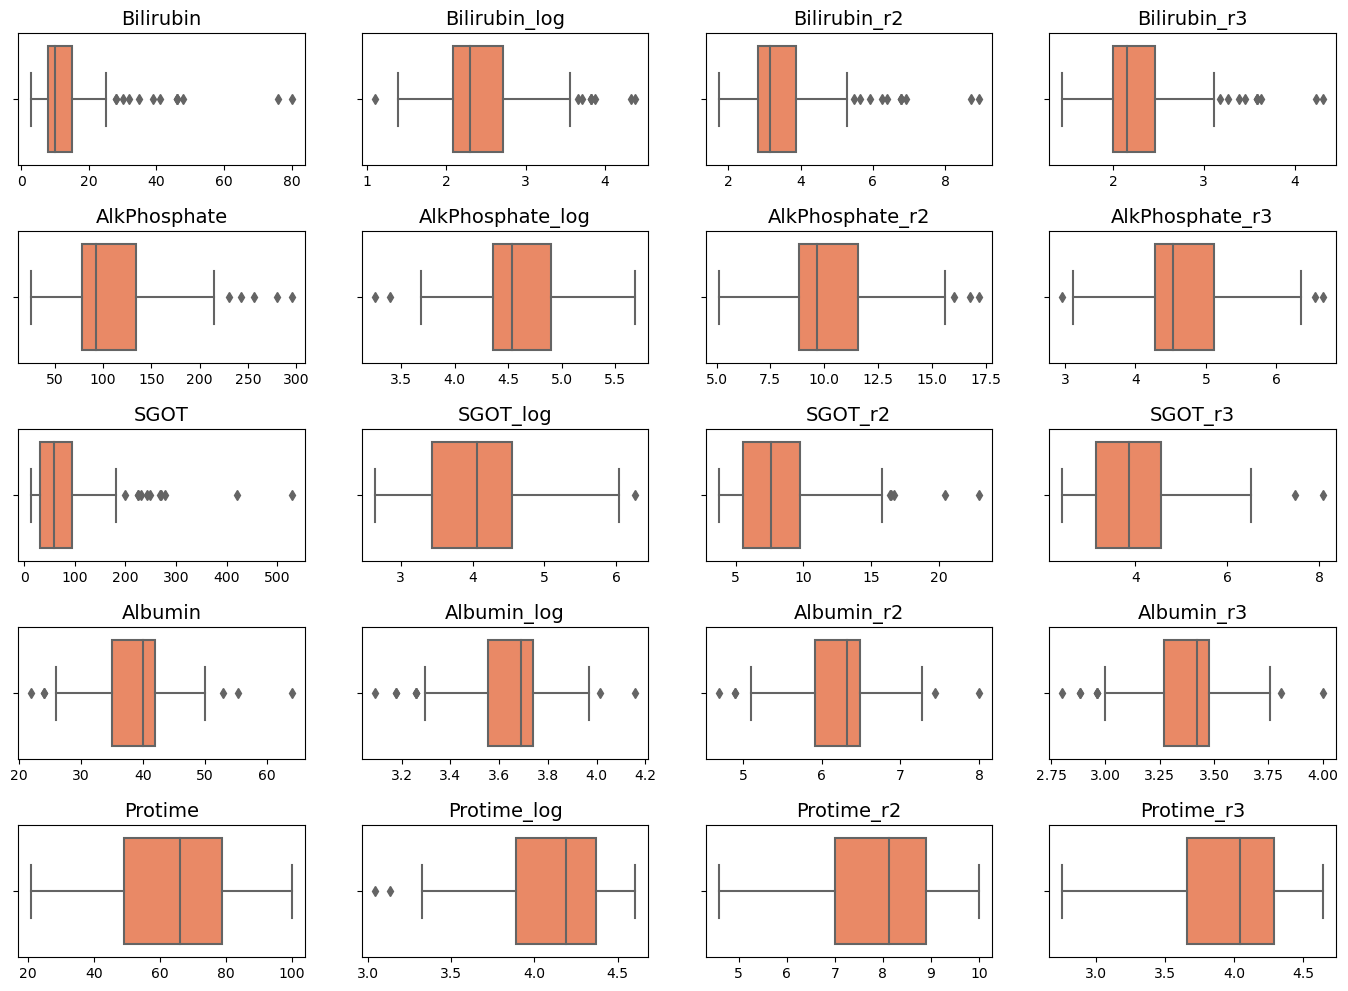

In [18]:
# Boxplots:
ptlib.plot_boxplots(
    x=list(transf_df.columns), data=transf_df, order=None, hue_order=None, colors='coral', plot_style=None,
    titles=list(transf_df.columns), titles_fontsize=14, xtick_labelsize=10, cols_nr=4, rows_nr=5, width=17, height=12,
    wspace=None, hspace=0.5
)

### Análise dos `outliers` de todas variáveis com o método `MAD`.

O método do desvio absoluto mediano (MAD = Median Absolute Deviation) substitui a média e o desvio padrão por estatísticas mais robustas, como a mediana e o desvio absoluto mediano.

In [19]:
# Primeiro, vamos criar um dataframe temporário:
data_num_out_df = data_num_df.copy(deep=True)

# Cria um dicionário onde serão armazenados os "outliers":
outliers_mad = {}

# Define as variáveis onde aplicaremos o método "MAD":
variables=['Bilirubin', 'AlkPhosphate', 'SGOT', 'Albumin', 'Protime']

# Aplica o método "MAD" em cada variável:
for var in variables:
    outliers_mad[var] = dslib.mad_method(data_num_out_df, var)

# Visualizando a quantidade de "outliers" em cada variável:
for var in variables:
    print("Outliers ({}): {}".format(var, len(outliers_mad[var])))

Outliers (Bilirubin): 14
Outliers (AlkPhosphate): 7
Outliers (SGOT): 11
Outliers (Albumin): 2
Outliers (Protime): 0


**Análise:** com o método **MAD**, **não** foram detectados *outliers* apenas na variável `Protime`.

### Tratamento dos `outliers` através da `Recodificação`.

Para a recodificação dos *outliers* vamos utilizar o método de **Imputação múltipla**. A imputação é um método que é frequentemente usado quando se trata de *dados ausentes* (missing values). Entretanto, ela também é aplicada quando se trata de valores extremos. Ao usar a imputação, os outliers são removidos (e com isso se tornam valores ausentes) e são substituídos por **estimativas** baseadas nos dados restantes.

In [20]:
# Primeiro, vamos remover os "outliers" detectados pelo método MAD:
# Loop para remover os outliers em cada variável:
for var in variables:
    data_num_out_df = dslib.outliers_to_nan(
        df=data_num_out_df, variable_name=var, probable_outliers=outliers_mad[var]
    )

# Verificando se os "outliers" foram removidos:
dslib.missing_values(data=data_num_out_df, axis=0, threshold=0.01, target=None)

Attributes (Columns),Total,Percent
Bilirubin,14,0.113821
SGOT,11,0.089431
AlkPhosphate,7,0.056911
Albumin,2,0.016260


In [21]:
# Em seguida, recodificaremos os "outliers" (NaN) utilizando a imputação múltipla:
# Início do processo:
ept.start(msg="Iniciando o processo de imputação...")
# Transform:
data_imp_tf = imputer_mv.transform(data_num_out_df)
ept.end(msg='Fim do processo:')

Iniciando o processo de imputação...
Fim do processo: 0.34 seconds.


In [22]:
# Salva os resultados no mesmo dataframe:
data_num_out_df = pd.DataFrame(data_imp_tf, columns=data_num_out_df.columns)

# Verificando se os "outliers" foram tratados:
dslib.missing_values(data=data_num_out_df, axis=0, threshold=0.01, target=None)

Attributes (Columns),Total,Percent


**Análise:** podemos observar que todos os *outliers* foram tratados!

### Analisando a distribuição dos dados em cada variável após o tratamento dos `outliers`

In [23]:
# Criando uma lista das variáveis numéricas cujos outliers foram tratados:
variables_out_num = ['Bilirubin', 'AlkPhosphate', 'SGOT', 'Albumin']
# Criando uma lista com as unidades de medida:
units = ['mg/L', 'U/L', 'U/L', 'g/L']

In [24]:
# Calculando algumas medidas estatísticas de tendência central, dispersão e de forma:
dslib.statistical_measures(df=data_num_out_df, feature=variables_out_num)

,Bilirubin,AlkPhosphate,SGOT,Albumin
count,123.000,123.000,123.000,123.000
mean,14.079,108.406,82.139,38.423
median,10.000,92.930,58.000,40.000
mode,10.000,85.000,20.000,40.000
std,12.167,49.982,79.963,6.555
var_coff,86.423,46.106,97.352,17.059
min,3.000,26.000,14.000,22.000
25%,8.000,78.000,31.000,35.000
50%,10.000,92.930,58.000,40.000
75%,15.000,133.880,95.000,42.000


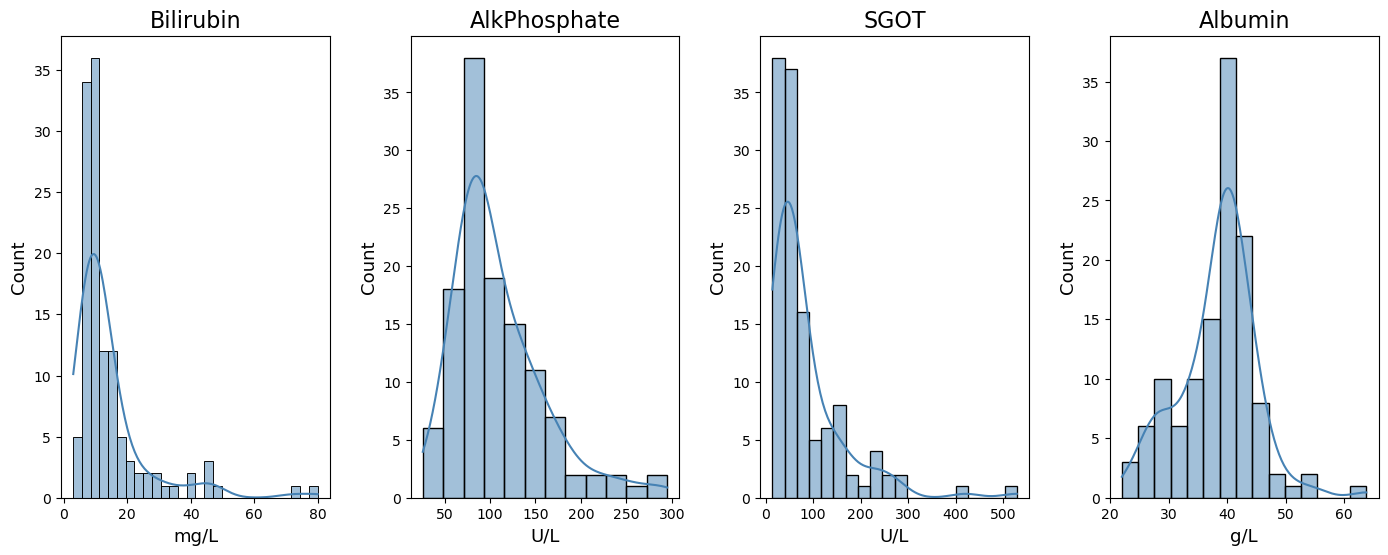

In [25]:
# Histogramas:
ptlib.plot_histograms(
    data=data_num_out_df, x=variables_out_num, kde=True, plot_style=None, color='steelblue', titles=variables_out_num,
    titles_fontsize=16, xlabels=units, xlabels_fontsize=13, ylabels='Count', ylabels_fontsize=13,
    xtick_labelsize=10, ytick_labelsize=10, cols_nr=4, rows_nr=1, width=17, height=6, wspace=0.3, hspace=None
)

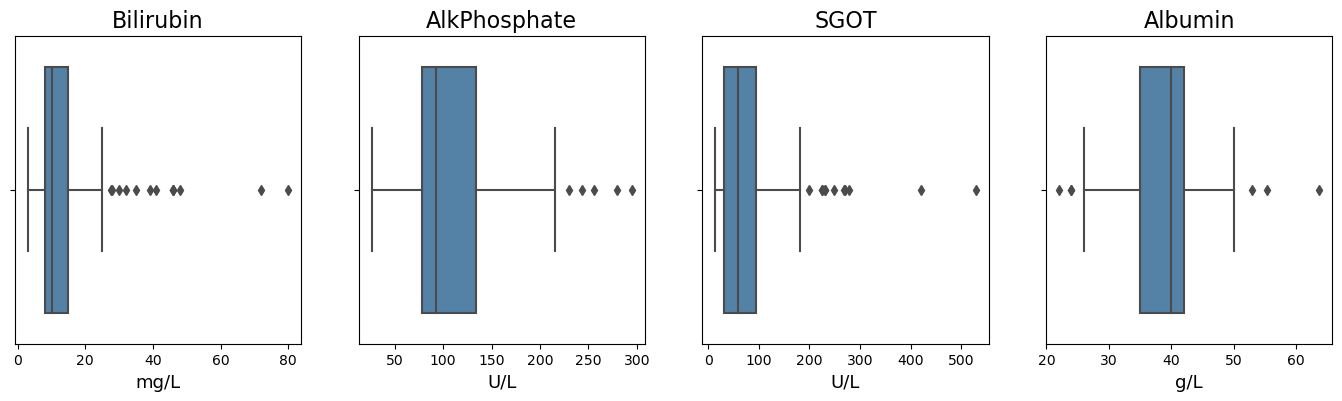

In [26]:
# Boxplots:
ptlib.plot_boxplots(
    x=variables_out_num, data=data_num_out_df, order=None, hue_order=None, colors='steelblue', plot_style=None,
    titles=variables_out_num, titles_fontsize=16, xlabels=units, xlabels_fontsize=13, xtick_labelsize=10,
    cols_nr=4, rows_nr=1, width=17, height=4, wspace=None, hspace=None
)

In [27]:
# Testes de hipóteses para verificarmos se as variáveis seguem (ou não) uma "distribuição normal":
dslib.shapiro_test(data=data_num_out_df, features=variables_out_num)

,confidence level,p-value,test
Variable,,,
Bilirubin,0.95,6.040122596047859e-16,no
AlkPhosphate,0.95,7.345010999415535e-08,no
SGOT,0.95,4.986441286465061e-14,no
Albumin,0.95,0.00022969838755670935,no


**Análise:** podemos observar que não conseguimos resultados satisfatórios no tratamento dos *outliers* utilizando o método **MAD**.

Então, vamos agora realizar o tratamento dos **outliers** utilizando um outro método chamado **Tukey**.

### Análise dos `outliers` de todas as variáveis utilizando o método `Tukey`.

Como os dados das variáveis **não seguem uma distribuição normal**, vamos utilizar o método de **Tukey** para detectar os prováveis e possíveis **outliers**. Como já vimos que as distribuições das variáveis `Bilirubin` e `SGOT` são altamente assimétricas, o método Tukey será estendido para o método de **log-IQ**, ou seja, cada valor será transformado em seu logaritmo antes de calcularmos as cercas internas (*inner fence*) e externas (*outer fence*).

In [28]:
# Primeiro, vamos criar um dataframe temporário contendo apenas as variáveis de interesse:
df_temp = pd.DataFrame(
    {'Bilirubin':data_num_df['Bilirubin'].values,
     'AlkPhosphate':data_num_df['AlkPhosphate'].values,
     'SGOT':data_num_df['SGOT'].values,
     'Albumin':data_num_df['Albumin'].values
    }
)
# Calculando o "log" para as variáveis altamente assimétricas:
df_temp['AlkPhosphate_log'] = np.log(df_temp['AlkPhosphate'])
df_temp['Bilirubin_log'] = np.log(df_temp['Bilirubin'])
df_temp['SGOT_log'] = np.log(df_temp['SGOT'])

# Resumo estatístico:
df_temp.describe()

,Bilirubin,AlkPhosphate,SGOT,Albumin,AlkPhosphate_log,Bilirubin_log,SGOT_log
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,14.115610,108.406423,82.235122,38.424553,4.591175,2.432593,4.077975
std,12.335455,49.982343,80.150597,6.562180,0.436005,0.593759,0.789138
min,3.000000,26.000000,14.000000,22.000000,3.258097,1.098612,2.639057
25%,8.000000,78.000000,31.000000,35.000000,4.356709,2.079442,3.433987
50%,10.000000,92.930000,58.000000,40.000000,4.531847,2.302585,4.060443
75%,15.000000,133.880000,95.000000,42.000000,4.896940,2.708050,4.553378
max,80.000000,295.000000,528.000000,64.000000,5.686975,4.382027,6.269096


In [29]:
# Criando dois dicionários para salvar os "prováveis" e "possíveis" outliers:
probable_outliers = {} # prováveis outliers.
possible_outliers = {} # possíveis outliers.

# Loop para detectar e armazenar os "prováveis" e "possíveis" outliers:
for var in list(df_temp.columns):
    # Calculando os prováveis e possíveis outliers de cada variável:
    prob_outliers, poss_outliers = dslib.tukeys_method(df_temp, var)
    # Salva os prováveis outliers:
    probable_outliers[var] = prob_outliers
    # Salva os possíveis outliers:
    possible_outliers[var] = poss_outliers    

# Visualizando a quantidade de "prováveis outliers" em cada variável:
print("Prováveis outliers:")
for var in list(df_temp.columns):
    print("{}: {}".format(var, len(probable_outliers[var])))

# Visualizando a quantidade de "possíveis outliers" em cada variável:
print("\nPossíveis outliers:")
for var in list(df_temp.columns):
    print("{}: {}".format(var, len(possible_outliers[var])))

Prováveis outliers:
Bilirubin: 8
AlkPhosphate: 0
SGOT: 2
Albumin: 1
AlkPhosphate_log: 0
Bilirubin_log: 0
SGOT_log: 0

Possíveis outliers:
Bilirubin: 13
AlkPhosphate: 5
SGOT: 11
Albumin: 6
AlkPhosphate_log: 2
Bilirubin_log: 9
SGOT_log: 1


**Análise:**
* foram detectados **prováveis outliers** em **3 variáveis**;
* foram detectados **possíveis outliers** em todas as variáveis.

### Tratamento dos `prováveis outliers` com o método `Tukey`.

Utilizaremos o método **Winsorizing** que foi introduzido por Tukey & McLaughlin em 1963. Com winsorizing, qualquer valor de uma variável acima ou abaixo de um percentil k em cada lado da distribuição das variáveis é substituído pelo valor do próprio percentil k. Por exemplo, se k=5, todas as observações acima do percentil 95 são recodificadas para o valor do percentil 95, e os valores abaixo do 5º percentil são recodificados, respectivamente.

Este método trabalha de mãos dadas com o método de boxplot de Tukey, pois muitas vezes é recomendado que k seja fixado na cerca externa (***outer fence***) **de uma amostra** (3 desvios padrão em torno da média). Isto ocorre freqüentemente em k=5 e, portanto, este valor de k é usado como o valor padrão.

In [30]:
# Criando dois dicionários para salvar os valores "Outer fences" de cada variável:
outer_fences_le = {} # Lower end outer fence.
outer_fences_ue = {} # Upper end outer fence.

# Loop para detectar e armazenar os valores "Outer fences":
for var in list(['Bilirubin', 'SGOT', 'Albumin']):
    # Calculando os valores "Outer fences" de cada variável:
    outer_fence_le, outer_fence_ue = dslib.fences(df_temp, var, kind='outer')
    # Salva o valor "Lower end outer fence":
    outer_fences_le[var] = outer_fence_le
    # Salva o valor "Upper end outer fence":
    outer_fences_ue[var] = outer_fence_ue    

# Visualizando os valores "Outer fences" de cada variável:
for var in list(['Bilirubin', 'SGOT', 'Albumin']):
    print("{}:".format(var))
    print("Lower end outer fence: {}".format(outer_fences_le[var]))
    print("Upper end outer fence: {}".format(outer_fences_ue[var]))
    print() # pula linha para separar as variáveis.

Bilirubin:
Lower end outer fence: -13.0
Upper end outer fence: 36.0

SGOT:
Lower end outer fence: -161.0
Upper end outer fence: 287.0

Albumin:
Lower end outer fence: 14.0
Upper end outer fence: 63.0



**Análise:** observe os valores calculados para a cerca externa superior (**upper outer fence**) e inferior (**lower outer fence**) de cada variável:
* `Bilirubin`: os dados serão *winsorizados* apenas na cauda direita;

* `SGOT`: os dados serão *winsorizados* apenas na cauda direita;

* `Albumin`: os dados serão *winsorizados* nas duas caudas (esquerda e direita);

Então, agora podemos olhar para valores em diferentes percentis para definirmos o valor de **k** para cada variável.

### <font color='red'>Bilirubin</font>

In [31]:
# Explorando diferentes quantis na cerca externa superior (upper end outer fence):
# Criando a lista de quantis:
q = [93, 93.5, 93.75, 94, 95, 96]
# Calculando os percentis:
dslib.get_features_percentiles(data=df_temp, features='Bilirubin', quantiles=q)

,Bilirubin
Percentile,
93%,33.38
93.5%,35.28
93.75%,36.50
94%,37.72
95%,40.80
96%,46.00


Parece que os percentis em **93.5% ou 93.75%** são os mais próximos da **upper outer fence**. Portanto, vamos *winsorizar* os dados utilizando os limites superiores **`0.065 ou 0.0625`** na função `winsorize` do *Scipy*.

### <font color='red'>SGOT</font>

In [32]:
# Explorando diferentes quantis na cerca externa superior (upper end outer fence):
# Criando a lista de quantis:
q = [95, 96, 97, 98, 98.25, 98.5, 99]
# Calculando os percentis:
dslib.get_features_percentiles(data=df_temp, features='SGOT', quantiles=q)

,SGOT
Percentile,
95%,240.900
96%,251.400
97%,269.680
98%,274.920
98.25%,277.055
98.5%,302.140
99%,388.760


Parece que os percentis em **98.25% ou 98.5%** são os mais próximos da **upper outer fence**. Portanto, vamos *winsorizar* os dados utilizando os limites superiores **`0.0175 ou 0.015`** na função `winsorize` do *Scipy*.

### <font color='red'>Albumin</font>

In [33]:
# Explorando diferentes quantis na cerca externa inferior (lower end outer fence):
# Criando a lista de quantis:
q = [0, 1, 2, 3]
# Calculando os percentis:
dslib.get_features_percentiles(data=df_temp, features='Albumin', quantiles=q)

,Albumin
Percentile,
0%,22.00
1%,24.00
2%,24.88
3%,26.00


In [34]:
# Explorando diferentes quantis na cerca externa superior (upper end outer fence):
# Criando a lista de quantis:
q = [95, 96, 97, 98, 99, 99.5, 99.75, 100]
# Calculando os percentis:
dslib.get_features_percentiles(data=df_temp, features='Albumin', quantiles=q)

,Albumin
Percentile,
95%,46.9000
96%,48.1200
97%,49.3400
98%,51.6800
99%,54.7940
99.5%,58.6930
99.75%,61.3465
100%,64.0000


Parece que o percentil em **0%** é o mais próximo da **lower outer fence** e que os percentis em **99.5% ou 99.75%** são os mais próximos da **upper outer fence**. Portanto, vamos *winsorizar* os dados  utilizando o limite inferior **`0`** e os limites superiores **`0.005 ou 0.0025`** na função `winsorize` do *Scipy*.

In [35]:
# Aplicando "winsorize" em cada variável:
df_temp['Bilirubin_out']         = winsorize(df_temp['Bilirubin'],        limits=(0, 0.065))
df_temp['SGOT_out']              = winsorize(df_temp['SGOT'],             limits=(0, 0.0175))
df_temp['Albumin_out']           = winsorize(df_temp['Albumin'],          limits=(0, 0.01))

In [36]:
# Resumo estatístico:
feats = ['Bilirubin', 'Bilirubin_out','SGOT', 'SGOT_out', 'Albumin', 'Albumin_out'] # definindo as variáveis.
df_temp[feats].describe()

,Bilirubin,Bilirubin_out,SGOT,SGOT_out,Albumin,Albumin_out
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,14.115610,13.221301,82.235122,79.048130,38.424553,38.353821
std,12.335455,8.920874,80.150597,66.919909,6.562180,6.326921
min,3.000000,3.000000,14.000000,14.000000,22.000000,22.000000
25%,8.000000,8.000000,31.000000,31.000000,35.000000,35.000000
50%,10.000000,10.000000,58.000000,58.000000,40.000000,40.000000
75%,15.000000,15.000000,95.000000,95.000000,42.000000,42.000000
max,80.000000,39.000000,528.000000,278.000000,64.000000,55.300000


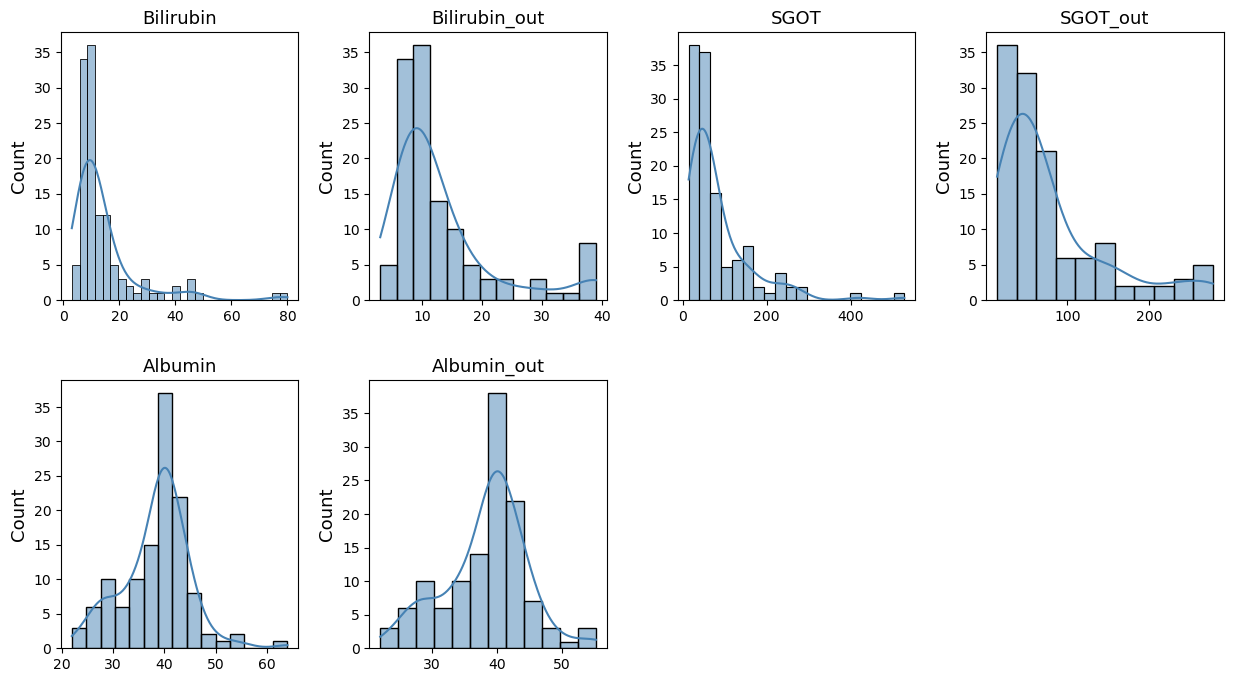

In [37]:
# Histogramas:
ptlib.plot_histograms(
    data=df_temp, x=feats, kde=True, plot_style=None, color='steelblue', titles=feats,
    titles_fontsize=13, ylabels='Count', ylabels_fontsize=13, xtick_labelsize=10, ytick_labelsize=10,
    cols_nr=4, rows_nr=2, width=15, height=8, wspace=0.3, hspace=0.3
)

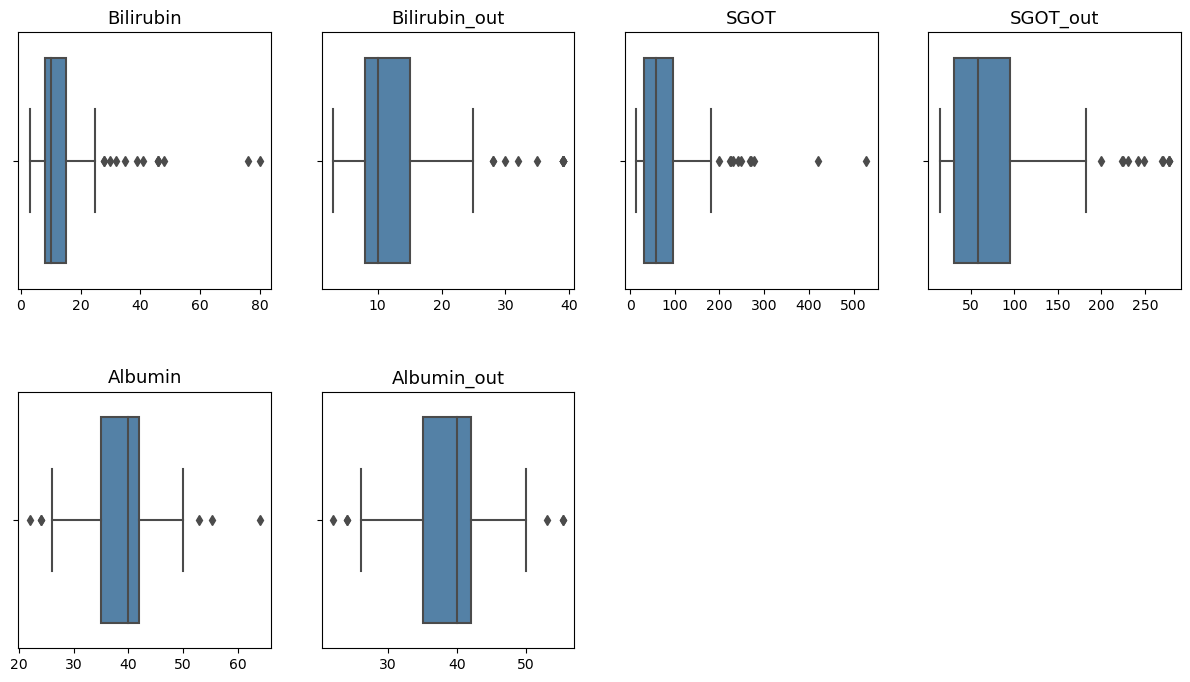

In [38]:
# Boxplots:df_temp
ptlib.plot_boxplots(
    x=feats, data=df_temp, order=None, hue_order=None, colors='steelblue', plot_style=None,
    titles=feats, titles_fontsize=13,xtick_labelsize=10, cols_nr=4, rows_nr=2, width=15, height=8,
    wspace=None, hspace=0.4
)

In [39]:
# Testes de hipóteses para verificarmos se as variáveis seguem (ou não) uma "distribuição normal":
dslib.shapiro_test(data=df_temp, features=['Bilirubin_out', 'SGOT_out', 'Albumin_out'])

,confidence level,p-value,test
Variable,,,
Bilirubin_out,0.95,2.7518129918843726e-13,no
SGOT_out,0.95,7.784272358646316e-12,no
Albumin_out,0.95,0.0011433879844844341,no


**Análise:** com o método **Tukey** todos os *prováveis outliers* foram removidos. Entretanto, mesmo com a **remoção** dos *prováveis outliers* todas as variáveis **não seguem uma distribuição normal**, com **95%** de confiança.

### Analisando os diagnósticos de cada exame, após a `remoção` dos `prováveis outliers`

Agora, vamos verificar se a **remoção** dos **prováveis outliers** alterou de forma significativa os diagnósticos dos exames com os seus valores originais (com os *outliers*).

In [40]:
# Definindo as variáveis "com outliers":
variables = ['Bilirubin', 'SGOT', 'Albumin']
# Calculando os diagnósticos "com outliers":
diag_df = pjlib.test_diagnosis(data=data_num_df, results=variables)
# Resumo de cada variável:
print("Diagnósticos 'com' outliers:")
dslib.groupby_count(data=diag_df, variables=variables, percent=True)

Diagnósticos 'com' outliers:


,Bilirubin,SGOT,Albumin
low,0.0000,0.0000,0.2439
normal,0.6016,0.3252,0.7480
high,0.3984,0.6748,0.0081


In [41]:
# Definindo as variáveis "sem outliers":
# Criando um dataframe temporário:
temp_df = pd.DataFrame({'Bilirubin': df_temp['Bilirubin_out'].values,
                        'SGOT': df_temp['SGOT_out'].values,
                        'Albumin': df_temp['Albumin_out'].values
                       }
)
# Incluindo a variável "Age", "AlkPhosphate" e "Protime" no dataframe.
# Incluímos as variáveis "Protime" e "AlkPhosphate" por exigência da função "pjlib.test_diagnosis".
temp_df['Age'] = data_num_df['Age'].values
temp_df['AlkPhosphate'] = data_num_df['AlkPhosphate'].values
temp_df['Protime'] = data_num_df['Protime'].values
# Calculando os diagnósticos "sem outliers":
diag_out_df = pjlib.test_diagnosis(data=temp_df, results=variables)
# Resumo de cada variável:
print("Diagnósticos 'sem' outliers:")
dslib.groupby_count(data=diag_out_df, variables=variables, percent=True)

Diagnósticos 'sem' outliers:


,Bilirubin,SGOT,Albumin
low,0.0000,0.0000,0.2439
normal,0.6016,0.3252,0.7561
high,0.3984,0.6748,0.0000


**Análise:** podemos observar que apenas na variável **`Albumin`** (exame de albumina) foram alterados os diagnósticos **normal** e **high**. Para as outras variáveis os diagnósticos estão **iguais**.

### Tratamento dos `possíveis outliers` com o método `Tukey`.

Utilizaremos o método **Winsorizing** que foi introduzido por Tukey & McLaughlin em 1963. Com winsorizing, qualquer valor de uma variável acima ou abaixo de um percentil k em cada lado da distribuição das variáveis é substituído pelo valor do próprio percentil k. Por exemplo, se k=5, todas as observações acima do percentil 95 são recodificadas para o valor do percentil 95, e os valores abaixo do 5º percentil são recodificados, respectivamente.

Este método trabalha de mãos dadas com o método de boxplot de Tukey, pois muitas vezes é recomendado que k seja fixado na cerca interna (***inner fence***) **de uma amostra** (1.5 desvios padrão em torno da média). Isto ocorre freqüentemente em k=5 e, portanto, este valor de k é usado como o valor padrão.

In [42]:
# Criando dois dicionários para salvar os valores "Inner fences" de cada variável:
inner_fences_le = {} # Lower end inner fence.
inner_fences_ue = {} # Upper end inner fence.

# Loop para detectar e armazenar os valores "Inner fences":
for var in list(df_temp.columns):
    # Calculando os valores "Inner fences" de cada variável:
    inner_fence_le, inner_fence_ue = dslib.fences(df_temp, var, kind='inner')
    # Salva o valor "Lower end inner fence":
    inner_fences_le[var] = inner_fence_le
    # Salva o valor "Upper end inner fence":
    inner_fences_ue[var] = inner_fence_ue    

# Visualizando os valores "Inner fences" de cada variável:
for var in list(df_temp.columns):
    print("{}:".format(var))
    print("Lower end inner fence: {}".format(inner_fences_le[var]))
    print("Upper end inner fence: {}".format(inner_fences_ue[var]))
    print() # pula linha para separar as variáveis.

Bilirubin:
Lower end inner fence: -2.5
Upper end inner fence: 25.5

AlkPhosphate:
Lower end inner fence: -5.819999999999993
Upper end inner fence: 217.7

SGOT:
Lower end inner fence: -65.0
Upper end inner fence: 191.0

Albumin:
Lower end inner fence: 24.5
Upper end inner fence: 52.5

AlkPhosphate_log:
Lower end inner fence: 3.546361675169621
Upper end inner fence: 5.707287412556209

Bilirubin_log:
Lower end inner fence: 1.1365285525462743
Upper end inner fence: 3.6509631902357715

SGOT_log:
Lower end inner fence: 1.754900969423156
Upper end inner fence: 6.232464262921797

Bilirubin_out:
Lower end inner fence: -2.5
Upper end inner fence: 25.5

SGOT_out:
Lower end inner fence: -65.0
Upper end inner fence: 191.0

Albumin_out:
Lower end inner fence: 24.5
Upper end inner fence: 52.5



**Análise:** observe os valores calculados para a cerca interna superior (**upper inner fence**) e inferior (**lower inner fence**) de cada variável:
* `Bilirubin`: os dados serão *winsorizados* apenas na cauda direita;

* `AlkPhosphate`: os dados serão *winsorizados* apenas na cauda direita;

* `SGOT`: os dados serão *winsorizados* apenas na cauda direita;

* `Albumin`: os dados serão *winsorizados* nas duas caudas (esquerda e direita);

* `AlkPhosphate_log`: os dados serão *winsorizados* nas duas caudas (esquerda e direita);

* `Bilirubin_log`: os dados serão *winsorizados* nas duas caudas (esquerda e direita);

* `SGOT_log`: os dados serão *winsorizados* nas duas caudas (esquerda e direita).

Então, agora podemos olhar para valores em diferentes percentis para definirmos o valor de **k** para cada variável.

### <font color='red'>Bilirubin</font>

In [43]:
# Explorando diferentes quantis na cerca interna superior (upper end inner fence):
# Criando a lista de quantis:
q = [88, 89, 89.5, 90, 91, 92, 93]
# Calculando os percentis:
dslib.get_features_percentiles(data=df_temp, features='Bilirubin', quantiles=q)

,Bilirubin
Percentile,
88%,23.00
89%,24.16
89.5%,25.57
90%,27.40
91%,28.04
92%,30.48
93%,33.38


Parece que o percentil em **88% ou 89%** é o mais próximo da **upper inner fence**. Portanto, vamos *winsorizar* os dados utilizando os limites superiores **`0.12 ou 0.11`** na função `winsorize` do *Scipy*.

### <font color='red'>AlkPhosphate</font>

In [44]:
# Explorando diferentes quantis na cerca interna superior (upper end inner fence):
# Criando a lista de quantis:
q = [94, 95, 96, 96.5, 97]
# Calculando os percentis:
dslib.get_features_percentiles(data=df_temp, features='AlkPhosphate', quantiles=q)

,AlkPhosphate
Percentile,
94%,193.04
95%,212.90
96%,216.80
96.5%,225.95
97%,234.42


Parece que o percentil em **95% ou 96%** é o mais próximo da **upper inner fence**. Portanto, vamos *winsorizar* os dados utilizando os limites superiores **`0.05 ou 0.04`** na função `winsorize` do *Scipy*.

### <font color='red'>SGOT</font>

In [45]:
# Explorando diferentes quantis na cerca interna superior (upper end inner fence):
# Criando a lista de quantis:
q = [90, 90.5, 91, 91.25, 91.5, 92, 93]
# Calculando os percentis:
dslib.get_features_percentiles(data=df_temp, features='SGOT', quantiles=q)

,SGOT
Percentile,
90%,178.00
90.5%,181.41
91%,182.36
91.25%,187.85
91.5%,193.34
92%,205.76
93%,224.46


Parece que o percentil em **90.5% ou 91%** é o mais próximo da **upper inner fence**. Portanto, vamos *winsorizar* os dados utilizando os limites superiores **`0.095 ou 0.09`** na função `winsorize` do *Scipy*.

### <font color='red'>Albumin</font>

In [46]:
# Explorando diferentes quantis na cerca interna inferior (lower end inner fence):
# Criando a lista de quantis:
q = [0, 1, 2, 3]
# Calculando os percentis:
dslib.get_features_percentiles(data=df_temp, features='Albumin', quantiles=q)

,Albumin
Percentile,
0%,22.00
1%,24.00
2%,24.88
3%,26.00


In [47]:
# Explorando diferentes quantis na cerca interna superior (upper end inner fence):
# Criando a lista de quantis:
q = [95, 96, 97, 98, 99]
# Calculando os percentis:
dslib.get_features_percentiles(data=df_temp, features='Albumin', quantiles=q)

,Albumin
Percentile,
95%,46.900
96%,48.120
97%,49.340
98%,51.680
99%,54.794


Parece que o percentil em **2% ou 3%** é o mais próximo da **lower inner fence** e que o percentil em **97% ou 98%** é o mais próximo da **upper inner fence**. Portanto, vamos *winsorizar* os dados  utilizando os limites inferiores **`0.02 ou 0.03`** e os limites superiores **`0.03 ou 0.02`** na função `winsorize` do *Scipy*.

### <font color='red'>AlkPhosphate_log</font>

In [48]:
# Explorando diferentes quantis na cerca interna inferior (lower end inner fence):
# Criando a lista de quantis:
q = [0, 1, 1.25, 1.5, 1.75, 2]
# Calculando os percentis:
dslib.get_features_percentiles(data=df_temp, features='AlkPhosphate_log', quantiles=q)

,AlkPhosphate_log
Percentile,
0%,3.258097
1%,3.464487
1.25%,3.552230
1.5%,3.639974
1.75%,3.701746
2%,3.730816


In [49]:
# Explorando diferentes quantis na cerca interna superior (upper end inner fence):
# Criando a lista de quantis:
q = [96, 97, 98, 99, 100]
# Calculando os percentis:
dslib.get_features_percentiles(data=df_temp, features='AlkPhosphate_log', quantiles=q)

,AlkPhosphate_log
Percentile,
96%,5.378731
97%,5.456773
98%,5.522246
99%,5.615075
100%,5.686975


Parece que o percentil em **1.5 ou 1.75** é o mais próximo da **lower inner fence** e que o percentil em **100%** é o mais próximo da **upper inner fence**. Portanto, vamos *winsorizar* os dados  utilizando os limites inferiores **`0.015 ou 0.0175`** e os limite superior **`0`** na função `winsorize` do *Scipy*.

### <font color='red'>Bilirubin_log</font>

In [50]:
# Explorando diferentes quantis na cerca interna inferior (lower end inner fence):
# Criando a lista de quantis:
q = [0, 1, 2, 3]
# Calculando os percentis:
dslib.get_features_percentiles(data=df_temp, features='Bilirubin_log', quantiles=q)

,Bilirubin_log
Percentile,
0%,1.098612
1%,1.386294
2%,1.484478
3%,1.609438


In [51]:
# Explorando diferentes quantis na cerca interna superior (upper end inner fence):
# Criando a lista de quantis:
q = [93, 94, 94.5, 95, 96]
# Calculando os percentis:
dslib.get_features_percentiles(data=df_temp, features='Bilirubin_log', quantiles=q)

,Bilirubin_log
Percentile,
93%,3.506957
94%,3.628933
94.5%,3.678065
95%,3.708571
96%,3.828641


Parece que o percentil em **0%** é o mais próximo da **lower inner fence** e que o percentil em **93% ou 94%** é o mais próximo da **upper inner fence**. Portanto, vamos *winsorizar* os dados  utilizando o limite inferior **`0.0`** e os limites superiores **`0.07 ou 0.06`** na função `winsorize` do *Scipy*.

### <font color='red'>SGOT_log</font>

In [52]:
# Explorando diferentes quantis na cerca interna inferior (lower end inner fence):
# Criando a lista de quantis:
q = [0, 1, 2, 3]
# Calculando os percentis:
dslib.get_features_percentiles(data=df_temp, features='SGOT_log', quantiles=q)

,SGOT_log
Percentile,
0%,2.639057
1%,2.668434
2%,2.772589
3%,2.850326


In [53]:
# Explorando diferentes quantis na cerca interna superior (upper end inner fence):
# Criando a lista de quantis:
q = [95, 96, 97, 98, 99, 100]
# Calculando os percentis:
dslib.get_features_percentiles(data=df_temp, features='SGOT_log', quantiles=q)

,SGOT_log
Percentile,
95%,5.484286
96%,5.526724
97%,5.597230
98%,5.616400
99%,5.949475
100%,6.269096


Parece que o percentil em **0%** é o mais próximo da **lower inner fence** e que o percentil em **98% ou 99%** é o mais próximo da **upper inner fence**. Portanto, vamos *winsorizar* os dados  utilizando o limite inferior **`0.0`** e os limites superiores **`0.02 ou 0.01`** na função `winsorize` do *Scipy*.

In [54]:
# Aplicando "winsorize" em cada variável:
df_temp['Bilirubin_out']         = winsorize(df_temp['Bilirubin'],        limits=(0, 0.11))
df_temp['AlkPhosphate_out']      = winsorize(df_temp['AlkPhosphate'],     limits=(0, 0.05))
df_temp['SGOT_out']              = winsorize(df_temp['SGOT'],             limits=(0, 0.09))
df_temp['Albumin_out']           = winsorize(df_temp['Albumin'],          limits=(0.03, 0.03))
df_temp['AlkPhosphate_log_out']  = winsorize(df_temp['AlkPhosphate_log'], limits=(0.0175, 0))
df_temp['Bilirubin_log_out']     = winsorize(df_temp['Bilirubin_log'],    limits=(0.01, 0.07))
df_temp['SGOT_log_out']          = winsorize(df_temp['SGOT_log'],         limits=(0, 0.01))

In [55]:
# Resumo estatístico:
feats = [
    'Bilirubin_out', 'AlkPhosphate_out', 'SGOT_out', 'Albumin_out', 'AlkPhosphate_log_out',
    'Bilirubin_log_out', 'SGOT_log_out'
] # definindo as variáveis.
df_temp[feats].describe()

,Bilirubin_out,AlkPhosphate_out,SGOT_out,Albumin_out,AlkPhosphate_log_out,Bilirubin_log_out,SGOT_log_out
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,12.083089,106.544634,73.007480,38.308293,4.597016,2.410507,4.076114
std,6.067663,44.558252,52.111936,5.922850,0.420998,0.526939,0.784184
min,3.000000,26.000000,14.000000,26.000000,3.688879,1.386294,2.639057
25%,8.000000,78.000000,31.000000,35.000000,4.356709,2.079442,3.433987
50%,10.000000,92.930000,58.000000,40.000000,4.531847,2.302585,4.060443
75%,15.000000,133.880000,95.000000,42.000000,4.896940,2.708050,4.553378
max,25.000000,215.000000,182.000000,50.000000,5.686975,3.555348,6.040255


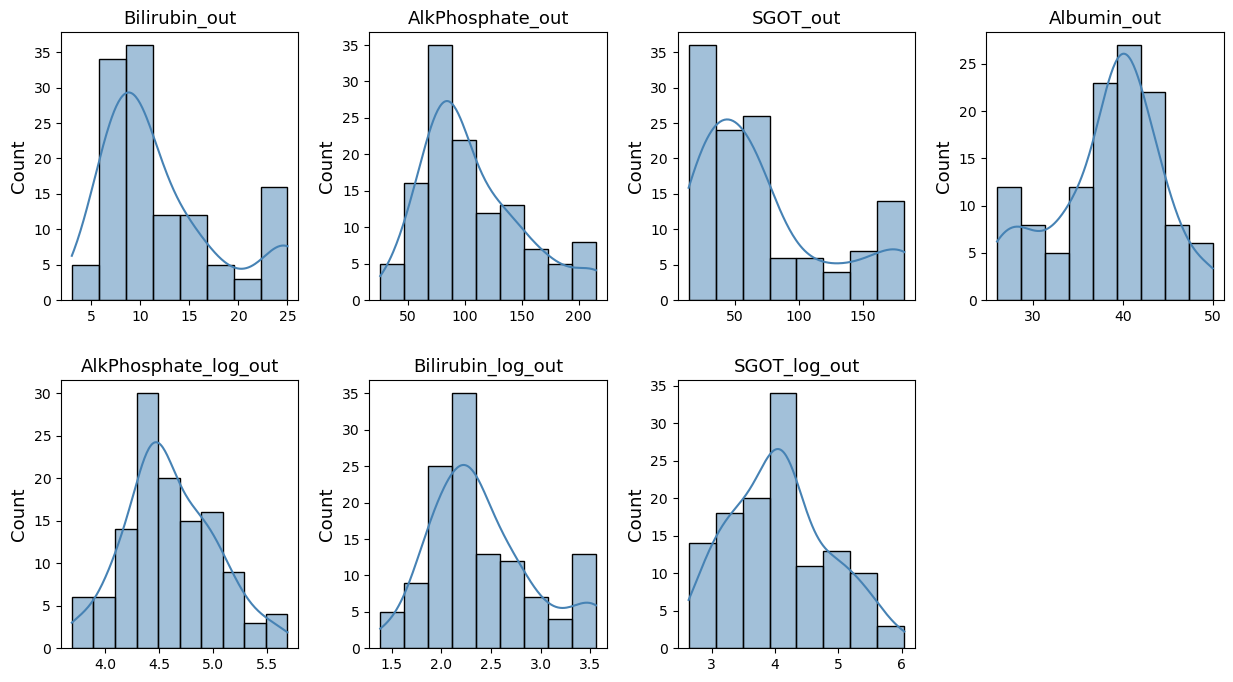

In [56]:
# Histogramas:
ptlib.plot_histograms(
    data=df_temp, x=feats, kde=True, plot_style=None, color='steelblue', titles=feats,
    titles_fontsize=13, ylabels='Count', ylabels_fontsize=13, xtick_labelsize=10, ytick_labelsize=10,
    cols_nr=4, rows_nr=2, width=15, height=8, wspace=0.3, hspace=0.3
)

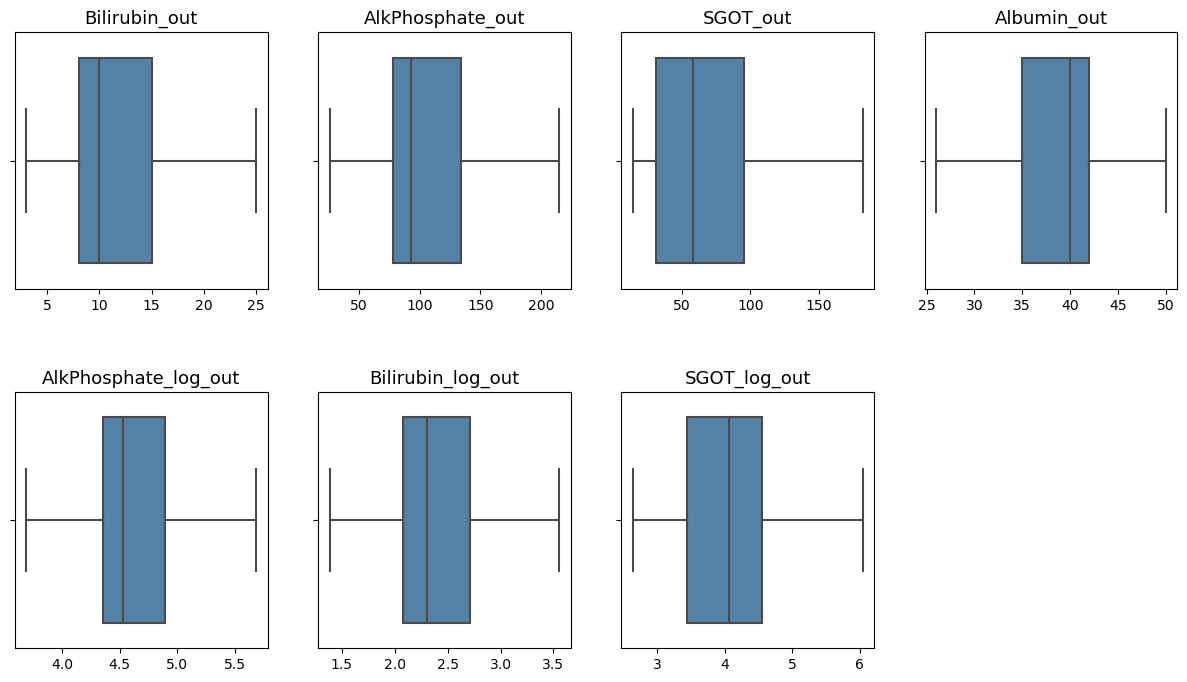

In [57]:
# Boxplots:df_temp
ptlib.plot_boxplots(
    x=feats, data=df_temp, order=None, hue_order=None, colors='steelblue', plot_style=None,
    titles=feats, titles_fontsize=13,xtick_labelsize=10, cols_nr=4, rows_nr=2, width=15, height=8,
    wspace=None, hspace=0.4
)

In [58]:
# Testes de hipóteses para verificarmos se as variáveis seguem (ou não) uma "distribuição normal":
dslib.shapiro_test(data=df_temp, features=feats)

,confidence level,p-value,test
Variable,,,
Bilirubin_out,0.95,9.961088620613623e-10,no
AlkPhosphate_out,0.95,4.976677246304462e-06,no
SGOT_out,0.95,5.084425658274938e-10,no
Albumin_out,0.95,0.00015372202324215323,no
AlkPhosphate_log_out,0.95,0.2570207118988037,yes
Bilirubin_log_out,0.95,1.6504722225363366e-05,no
SGOT_log_out,0.95,0.03236834332346916,no


**Análise:** com o método **Tukey** todos os *outliers* foram removidos. Entretanto, apenas os dados da variável `AlkPhosphate_log_out` **seguem uma distribuição normal**, com **95%** de confiança.

### Analisando os diagnósticos de cada exame, após a `remoção` dos `possíveis outliers`

Agora, vamos verificar se a **remoção** dos **possíveis outliers** alterou de forma significativa os diagnósticos dos exames com os seus valores originais (com os *outliers*).

Primeiro, vamos começar analisando as variáveis: `Bilirubin_out`, `AlkPhosphate_out`, `SGOT_out` e `Albumin_out`.

In [59]:
# Definindo as variáveis "com outliers":
variables = ['Bilirubin', 'AlkPhosphate', 'SGOT', 'Albumin']
# Calculando os diagnósticos "com outliers":
diag_df = pjlib.test_diagnosis(data=data_num_df, results=variables)
# Resumo de cada variável:
print("Diagnósticos 'com' outliers:")
dslib.groupby_count(data=diag_df, variables=variables, percent=True)

Diagnósticos 'com' outliers:


,Bilirubin,AlkPhosphate,SGOT,Albumin
low,0.0000,0.0407,0.0000,0.2439
normal,0.6016,0.6667,0.3252,0.7480
high,0.3984,0.2927,0.6748,0.0081


In [60]:
# Definindo as variáveis "sem outliers":
variables_out = ['Bilirubin_out', 'AlkPhosphate_out', 'SGOT_out', 'Albumin_out']
# Criando um dataframe temporário:
temp_df = df_temp[variables_out]
# Incluindo a variável "Age" e "Protime" no dataframe.
# Incluímos a variável "Protime" por exigência da função "pjlib.test_diagnosis".
temp_df['Age'] = data_num_df['Age'].values
temp_df['Protime'] = data_num_df['Protime'].values
# Renomeando as variáveis por exigência da função "pjlib.test_diagnosis":
temp_df.rename(
    columns={'Bilirubin_out':'Bilirubin', 'AlkPhosphate_out':'AlkPhosphate',
             'SGOT_out':'SGOT', 'Albumin_out':'Albumin'},
    inplace=True
)
# Calculando os diagnósticos "sem outliers":
diag_out_df = pjlib.test_diagnosis(data=temp_df, results=variables)
# Resumo de cada variável:
print("Diagnósticos 'sem' outliers:")
dslib.groupby_count(data=diag_out_df, variables=variables, percent=True)

Diagnósticos 'sem' outliers:


,Bilirubin,AlkPhosphate,SGOT,Albumin
low,0.0000,0.0407,0.0000,0.2439
normal,0.6016,0.6667,0.3252,0.7561
high,0.3984,0.2927,0.6748,0.0000


**Análise:** podemos observar que apenas na variável **`Albumin`** (exame de albumina) foram alterados os diagnósticos **normal** e **high**. Para as outras variáveis os diagnósticos estão **iguais**.

Agora, vamos analisar as variáveis: `Bilirubin_log_out`, `AlkPhosphate_log_out` e `SGOT_log_out`.

In [61]:
# Definindo as variáveis "sem outliers":
variables = ['Bilirubin', 'AlkPhosphate', 'SGOT']
# Criando um dataframe temporário:
# Incluímos a variável "Albumin" por exigência da função "pjlib.test_diagnosis".
temp_df = pd.DataFrame({'Bilirubin': np.exp(df_temp['Bilirubin_log_out'].values),
                        'AlkPhosphate': np.exp(df_temp['AlkPhosphate_log_out'].values),
                        'SGOT': np.exp(df_temp['SGOT_log_out'].values),
                        'Albumin': df_temp['Albumin_out'].values
                       }
)
# Incluindo a variável "Age" e "Protime" no dataframe.
# Incluímos a variável "Protime" por exigência da função "pjlib.test_diagnosis".
temp_df['Age'] = data_num_df['Age'].values
temp_df['Protime'] = data_num_df['Protime'].values
# Calculando os diagnósticos "sem outliers":
diag_out_df = pjlib.test_diagnosis(data=temp_df, results=variables)
# Resumo de cada variável:
print("Diagnósticos 'sem' outliers:")
dslib.groupby_count(data=diag_out_df, variables=variables, percent=True)

Diagnósticos 'sem' outliers:


,Bilirubin,AlkPhosphate,SGOT
low,0.0000,0.0407,0.0000
normal,0.4065,0.6667,0.3252
high,0.5935,0.2927,0.6748


**Análise:** podemos observar que apenas na variável **`Bilirubin`** (exame de bilirrubina) foram alterados os diagnósticos **normal** e **high** de forma significativa. Para as outras variáveis os diagnósticos estão **iguais**.

## <font color='blue'>5- Conclusões</font>

Nesta etapa de **análise exploratória dos dados** realizamos a análise *univariada* das variáveis numéricas incluindo também o tratamento de **outliers**. Então, para cada variável concluímos que:

#### <font color='red'>**Age:**</font>
>* a sua distribuição de dados **segue uma distribuição normal**;
>* **não foram detectados** valores extremos nos dados (**outliers**).

#### <font color='red'>**Bilirubin:**</font>
>* a sua distribuição de dados possui uma **alta assimetria positiva** e **não segue uma distribuição normal**. A transformação logarítmica (**log**) diminuiu a sua assimetria positiva mas a sua distribuição **não segue uma distribuição normal**;
>* **foram detectados** valores extremos nos dados (**outliers**).  O tratamento  dos *possíveis outliers*, pelo método *Tukey*, eliminou todos os *outliers*, porém alterou de forma significativa os diagnósticos deste exame e por isso não será utilizada na etapa de modelagem preditiva.

#### <font color='red'>**AlkPhosphate:**</font>
>* a sua distribuição de dados possui uma **moderada assimetria positiva** e **não segue uma distribuição normal**. A transformação logarítmica (**log**) eliminou a sua assimetria positiva e, com isso, a sua distribuição **segue uma distribuição normal**;
>* **foram detectados** valores extremos nos dados (**outliers**).  O tratamento  dos *possíveis outliers*, pelo método *Tukey*, eliminou todos os *outliers* nas duas variáveis: `AlkPhosphate` e `AlkPhosphate_log`. Para as duas variáveis a remoção dos *outliers* não alterou os diagnósticos deste exame e, por isso, poderemos utilizá-las na etapa de modelagem preditiva.

#### <font color='red'>**SGOT:**</font>
>* a sua distribuição de dados possui uma **alta assimetria positiva** e **não segue uma distribuição normal**. A transformação logarítmica (**log**) diminuiu bastante a sua assimetria positiva mas, ainda assim, a sua distribuição **não segue uma distribuição normal**;
>* **foram detectados** valores extremos nos dados (**outliers**).  O tratamento  dos *possíveis outliers*, pelo método *Tukey*, eliminou todos os *outliers* nas duas variáveis: `SGOT` e `SGOT_log`. Para as duas variáveis a remoção dos *outliers* não alterou os diagnósticos deste exame e, por isso, poderemos utilizá-las na etapa de modelagem preditiva.

#### <font color='red'>**Albumin:**</font>
>* a sua distribuição de dados possui uma **alta simetria** e **não segue uma distribuição normal**;
>* **foram detectados** valores extremos nos dados (**outliers**).  O tratamento  dos *possíveis outliers*, pelo método *Tukey*, eliminou todos os *outliers*, mas alterou de forma significativa os diagnósticos deste exame e, por isso, não poderemos utilizá-la na etapa de modelagem preditiva.

#### <font color='red'>**Protime:**</font>
>* a sua distribuição de dados possui uma **alta simetria** e **não segue uma distribuição normal**. As transformações aplicadas tornaram as distribuições dos dados com uma **alta assimetria negativa**;
>* **não foram detectados** valores extremos nos dados (**outliers**).

## <font color='black'>FIM</font>